<a href="https://colab.research.google.com/github/snmkrhn/EEG-Sinyalleri-ile-Psikiyatrik-Bozukluklar-n-Tespiti/blob/main/EEG_Sinyalleri_ile_Psikiyatrik_Bozukluklar%C4%B1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# kaggle.json dosyasını yükle
files.upload()


Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"sinemkarahan","key":"98f966dcd7539fa1de39ad8b0c8e7639"}'}

In [ ]:
!ls


 eeg-psychiatric-disorders-dataset.zip	'kaggle (3).json'   sample_data


In [ ]:
!mv "kaggle (3).json" kaggle.json


In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d shashwatwork/eeg-psychiatric-disorders-dataset --force



Dataset URL: https://www.kaggle.com/datasets/shashwatwork/eeg-psychiatric-disorders-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/4.72M [00:00<?, ?B/s]
100% 4.72M/4.72M [00:00<00:00, 74.9MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("eeg-psychiatric-disorders-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("eeg_data")


In [ ]:
!ls eeg_data


EEG.machinelearing_data_BRMH.csv


In [ ]:
!ls /content/


eeg_data  eeg-psychiatric-disorders-dataset.zip  kaggle.json  sample_data


In [ ]:
import zipfile

# Zip dosyasını çıkartalım
with zipfile.ZipFile("eeg-psychiatric-disorders-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/eeg_data")

# Çıkartma işleminden sonra dosya listesini kontrol edelim
!ls /content/eeg_data


EEG.machinelearing_data_BRMH.csv


In [ ]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv('/content/eeg_data/EEG.machinelearing_data_BRMH.csv')

# İlk birkaç satırı göster
df.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [2]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from math import ceil

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


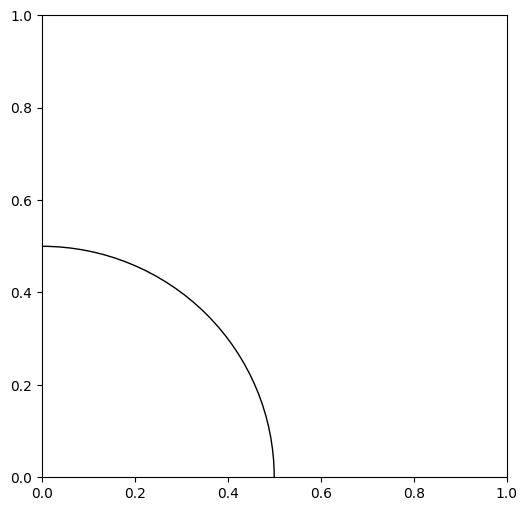

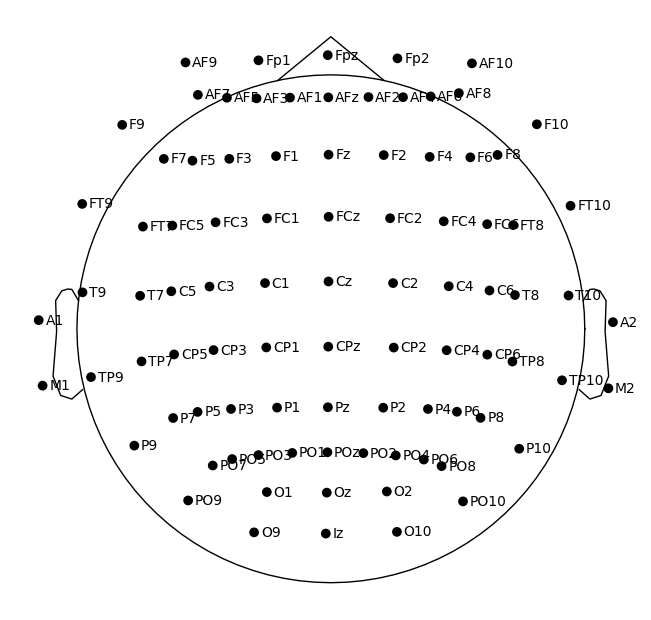

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# 10-20 sistemine göre EEG elektrot yerleşimi
montage = mne.channels.make_standard_montage("standard_1020")

# Elektrot noktalarını al
ch_positions = montage.get_positions()['ch_pos']

# X ve Y koordinatlarını al
xy_coords = np.array([ch_positions[ch][:2] for ch in montage.ch_names])

# Elektrot isimlerini al
labels = montage.ch_names

# Renkleri belirle (frontal, parietal, occipital gibi farklı bölgeler için)
colors = {
    'F': 'lightblue',   # Frontal lob
    'C': 'yellow',      # Central bölge
    'P': 'lightgreen',  # Parietal lob
    'O': 'lightcoral',  # Oksipital lob
    'T': 'lightgreen',  # Temporal lob
}

fig, ax = plt.subplots(figsize=(6, 6))

# Beyin şekli çizimi
circle = plt.Circle((0, 0), 0.5, color='black', fill=False)
ax.add_artist(circle)

import mne
import matplotlib.pyplot as plt

# 10-20 sistemine göre standart elektrot yerleşimi
montage = mne.channels.make_standard_montage("standard_1020")

# Elektrotları göster
fig = montage.plot(kind='topomap', show_names=True)

plt.show()





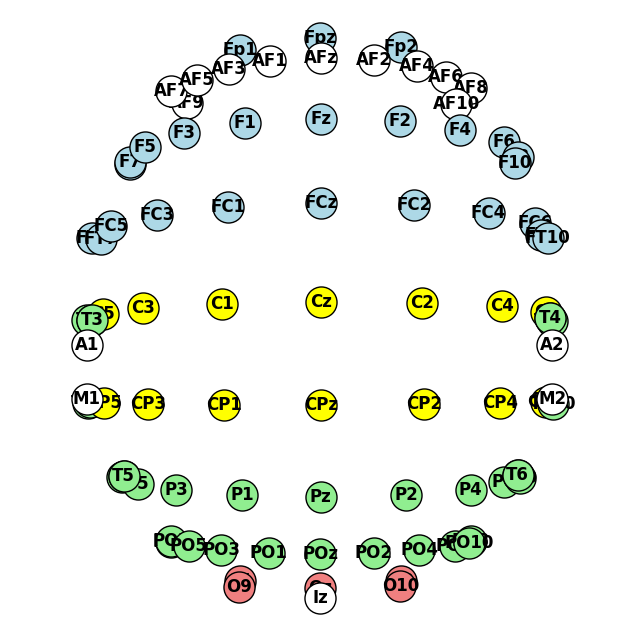

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# 10-20 sistemine göre EEG elektrot yerleşimi
montage = mne.channels.make_standard_montage("standard_1020")

# Elektrot noktalarını al
ch_positions = montage.get_positions()['ch_pos']

# X ve Y koordinatlarını al
xy_coords = np.array([ch_positions[ch][:2] for ch in montage.ch_names])

# Elektrot isimlerini al
labels = montage.ch_names

# Renkleri belirle (frontal, parietal, occipital gibi farklı bölgeler için)
colors = {
    'F': 'lightblue',   # Frontal lob
    'C': 'yellow',      # Central bölge
    'P': 'lightgreen',  # Parietal lob
    'O': 'lightcoral',  # Oksipital lob
    'T': 'lightgreen',  # Temporal lob
}

fig, ax = plt.subplots(figsize=(8, 8))  # Grafik boyutunu büyüttüm

# Beyin şekli çizimi
circle = plt.Circle((0, 0), 0.5, color='black', fill=False)
ax.add_artist(circle)

# Elektrot noktalarını çiz
for i, (x, y) in enumerate(xy_coords):
    region = labels[i][0]  # İlk harf ile bölge belirle
    color = colors.get(region, 'white')  # Bölgeye göre renk seç

    # Elektrot noktası çiz
    ax.scatter(x, y, color=color, edgecolors='black', s=500, zorder=3)

    # Elektrot ismini yaz
    ax.text(x, y, labels[i], fontsize=12, ha='center', va='center', fontweight='bold')

ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# 🔥 Eksenleri eşit oranda ölçeklendir
plt.axis("equal")

plt.show()


In [13]:
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()
channels

,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [14]:
for key in chs.keys():
    chs[key]+=[0]
chs

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

<ipython-input-15-dd49041d41c7>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mont.plot()


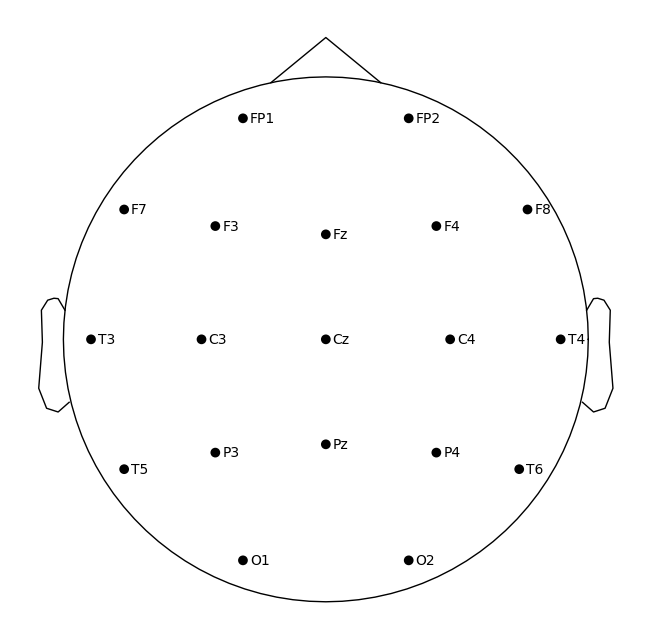

In [15]:
mont = mne.channels.make_dig_montage(chs)
mont.plot()
plt.show()